By: Yuan Zhang

SN: 17044633

# Homework 2

**Start date:** *29th January 2018*

**Due date:** *11th February 2018, 11:55 pm*

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw2.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We will not re-run your code.

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below). But note that this will be the only usage of TensorFlow in this assignment.

## The Assignment

### Objectives

This assignment will be mirroring the first assignment (DL_hw1), but this time you are **not allowed to use any of the Tensorflow functionality for specifing nor optimizing** your neural network models. 
You will now use your **own implementations** of different neural network models (labelled Model 1-4, and described in the corresponding sections of the Colab).

As before, you will train these models to classify hand written digits from the Mnist dataset. 

Keep in mind, the purpose of this exercise is to implement and optimize your own neural networks
architectures without the toolbox/library tailored to do so. This also means, in order to train and evaluate your models, you will need to implement your own optimization procedure. You are to use the same cross-entropy loss as before and your own implementation of SGD.

#### Additional instruction:

**Do not use any other libraries than the ones provided in the imports cell.** You should be able to do everything via *numpy* (especially for the convolutional layer, rely on the in-built matrix/tensor multiplication that numpy offers).  

There are a few questions at the end of the colab. **Before doing any coding, please take look at Question 1** -- this should help you with the implementations, especially the optimization part.


### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.


### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function. Sum over the batch.


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 

each time evaluate the accuracy of the model both on 20% of the **train** set and on the entire **test** set.

### Reporting

For each model i, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the and utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       (num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       (num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       (num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]


### Hint: 

Remind yourselves of the chain rule and read through the lecture notes on back-propagation (computing 
the gradients by recursively applying the chain rule). This is a general procedure that applies to all model
architectures you will have to code in the following steps. Thus, you are strongly encourage to implement an
optimization procedure that generalizes and can be re-used to train all your models. Recall the only things
that you will need for each layer are: 

(i) the gradients of layer with respect to its input

(ii) the gradients with respect to its parameters, if any.

(See Question 1).


Also from the previous assignment, you should have a good idea of what to expect, both terms of behavior and relative performance. (To keep everything comparable, we kept all the hyperparameters and reporting the same).

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import copy
# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10]) 
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 4, figsize=(22,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      cell_text[i].append(test_accuracy[-1])
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# Define our module

In [0]:
# define linear_module
class Linear_Module:
  def __init__(self,shape_w, shape_b):
      print('Linear constructed')
      range_w = np.sqrt(6. / (shape_w[0] + shape_w[1] + 1))
      range_b = np.sqrt(6. / (shape_b[0] + 1))
      self.w = np.random.uniform(-range_w,range_w,shape_w)
      self.b = np.random.uniform(-range_b,range_b,shape_b)
      
  def forward_pass(self,x):
    y = np.matmul(x,self.w)+self.b
    return y
  
  def backward_pass(self,dL_dy,x,lr):
    dL_dx = np.matmul(dL_dy,self.w.T)
    # SGD
    dw = np.matmul(x.T,dL_dy)
    db = np.sum(dL_dy,axis=0)
    self.b -= lr*db
    self.w -= lr*dw
    return dL_dx

# define relu_module
class Relu_Module:
  def __init__(self):
    print('Relu constructed')
  def forward_pass(self,x):
    y = x * (x > 0)
    return y
  
  def backward_pass(self,dL_dy,y):
    dL_dx = dL_dy *( y > 0 )
    return dL_dx

# define cross-entropy_module
class CE_Module:
  def __init__(self):
    print('Cross-entropy constructed')
  def forward_pass(self,x,y_):
    y= np.sum(np.log((np.sum(np.exp(x), axis=1)))-x[range(len(x)),np.argmax(y_,1)])
    return y
  
  def backward_pass(self,x,y_): 
    probs = np.exp(x - np.max(x, axis=1, keepdims=True))
    probs /= np.sum(probs, axis=1, keepdims=True)
    dx = probs.copy()
    dx[range(len(x)),np.argmax(y_,1)] -= 1
    return dx

# define softmax_module(using for prediction)
class Softmax_Module:
  def __init__(self):
    print('Softmax constructed')
  def forward_pass(self,x):
    y = np.exp(x - np.max(x, axis=1, keepdims=True))
    y /= np.sum(y, axis=1,keepdims=True)
    return y
  
# define conv_module
class Conv_Module:
  def __init__(self,shape_w, shape_b,strides=[1,1],padding='SAME'):
      print('Conv constructed')
      range_w = np.sqrt(6. / (shape_w[0] + shape_w[1] +1))
      range_b = np.sqrt(6. / (shape_b[0] + 1))
      self.w = np.random.uniform(-range_w,range_w,shape_w)
      self.b = np.random.uniform(-range_b,range_b,shape_b)
      self.strides = strides
      self.padding = padding
    
  def forward_pass(self,x):
    F, C, HH, WW, = self.w.shape
    N, C, H, W = x.shape

    stride_h = self.strides[0]
    stride_w = self.strides[1]
    padding = self.padding
    
    if padding=='SAME':
      pad1 = int((HH-stride_h+H*(stride_h-1))/2.)
      pad2 = int((WW-stride_w+W*(stride_w-1))/2.)
    else:
      pad1,pad2 = 0,0
    
    Hy = int((H+2*pad1-HH)/stride_h)+1
    Wy = int((W+2*pad2-WW)/stride_w)+1
        
    # Add padding around each 2D image
    padded = np.pad(x, [(0,0), (0,0), (pad1,pad1), (pad2,pad2)], 'constant')
      
    # change padded to -1,(HH*WW*C) matrix
    for j1 in range(C):
      for j2 in range(HH):
        for j3 in range(WW):
          tmp = padded[:,j1:j1+1,j2:(H+2*pad1+j2-HH+1):stride_h,j3:(W+2*pad2+j3-WW+1):stride_w]
          col = np.reshape(tmp,(-1,1))
          if (j1==0 and j2==0 and j3==0):
            x_col = col
          else:
            x_col = np.concatenate((x_col,col),axis=1)
     
    w_reshaped = np.reshape(self.w,[F,-1])
    w_reshaped = np.transpose(w_reshaped,(1,0))
    y = np.matmul(x_col,w_reshaped)+self.b
      
    y = np.reshape(y,(N,Hy,Wy,F))
    y = np.transpose(y,(0,3,1,2))

    return y
  
  def backward_pass(self,dL_dy,x,lr):
    F, C, HH, WW = self.w.shape
    N, C, H, W = x.shape
    
    stride_h = self.strides[0]
    stride_w = self.strides[1]
    padding = self.padding
    
    if padding=='SAME':
      pad1 = int((HH-stride_h+H*(stride_h-1))/2.)
      pad2 = int((WW-stride_w+W*(stride_w-1))/2.)
    else:
      pad1,pad2 = 0,0
    
    Hy = int((H+2*pad1-HH)/stride_h)+1
    Wy = int((W+2*pad2-WW)/stride_w)+1
    
    
    dx = np.zeros_like(x)
    dw = np.zeros_like(self.w)
    db = np.zeros_like(self.b)
    
    b = copy.deepcopy(self.b)
    w_reshaped = np.reshape(copy.deepcopy(self.w),[F,-1])
    
    padded = np.pad(x, [(0,0), (0,0), (pad1,pad1), (pad2,pad2)], 'constant')
    padded_dx = np.pad(dx, [(0,0), (0,0), (pad1,pad1), (pad2,pad2)], 'constant')
   
 # change padded to -1,(HH*WW*C) matrix
    for j1 in range(C):
      for j2 in range(HH):
        for j3 in range(WW):
          tmp = padded[:,j1:j1+1,j2:(H+2*pad1+j2-HH+1):stride_h,j3:(W+2*pad2+j3-WW+1):stride_w]
          col = np.reshape(tmp,(-1,1))
          if (j1==0 and j2==0 and j3==0):
            x_col = col
          else:
            x_col = np.concatenate((x_col,col),axis=1)
            
    y2 = np.transpose(dL_dy,(0,2,3,1))
    y2 = np.reshape(y2,(-1,F))
    
    dx_col = np.matmul(y2,w_reshaped)
      
    for j1 in range(C):
      for j2 in range(HH):
        for j3 in range(WW):
          col_ind = j1*HH*WW+j2*WW+j3
          col = dx_col[:,col_ind:col_ind+1]
          block = np.reshape(col,[-1,1,Hy,Wy])
          padded_dx[:,j1:j1+1,j2:(H+2*pad1+j2-HH+1):stride_h,j3:(W+2*pad2+j3-WW+1):stride_w] += block
         
    # Unpad
    dx = padded_dx[:, :, pad1:pad1+H, pad2:pad2+W]
            
    dout = np.transpose(dL_dy,(0,2,3,1))
    dout = np.reshape(dout,(-1,F))
    
    w_reshaped -= lr * np.matmul(dout.T, x_col)
    b -= lr * np.sum(dout.T, axis=1)
  
    w = np.reshape(w_reshaped,[F,C,HH,WW])
    
    self.w = w
    self.b = b

    return dx

# define max_pooling(no overlapped)
class Pool_Module:
  def __init__(self,pool_size):
      print('Max_Pool constructed')
      self.ps = pool_size
      
  def forward_pass(self,x):
    (samples,cx,hx,wx) = x.shape
    hy = int(hx/self.ps[0])
    wy = int(wx/self.ps[1])
    y = np.zeros([samples,cx,hy,wy])
    x_reshaped = np.reshape(x,(samples * cx * hx, wx))
    
    # change x_reshaped to rows*4 matrix
    for j1 in range(self.ps[0]):
      for j2 in range(self.ps[1]):
        tmp = x_reshaped[j1::self.ps[0],j2::self.ps[1]]
        col = np.reshape(tmp,(-1,1))
        if (j1==0 and j2==0):
          x_col = col
        else:
          x_col = np.concatenate((x_col,col),axis=1)
        
    max_idx = np.argmax(x_col, axis=1)
    y = x_col[range(len(max_idx)),max_idx]
    y = np.reshape(y,(samples,cx,hy,-1))
    return y,max_idx

    
  def backward_pass(self,dL_dy,max_idx):
    (samples,cy,hy,wy) = dL_dy.shape
    dy_reshaped = np.reshape(dL_dy,(-1,1))
    hx = int(hy*self.ps[0])
    wx = int(wy*self.ps[1])
    
    dy_reshaped = np.transpose(dy_reshaped,(1,0))
    dx_reshaped = np.zeros([self.ps[0]*self.ps[1],len(max_idx)])
    dx_reshaped[max_idx,range(len(max_idx))] = dy_reshaped 
    dx_reshaped = np.transpose(dx_reshaped,(1,0))
                                                    
    img = np.zeros([samples*cy*hx,wx])
    # change dx_reshaped to a 4-dim matrix dL_dx
    for j1 in range(self.ps[0]):
      for j2 in range(self.ps[1]):
        col = dx_reshaped[:,j1*self.ps[0]+j2]
        tmp = img[j1::self.ps[0],j2::self.ps[1]]
        img[j1::self.ps[0],j2::self.ps[1]] = np.reshape(col,(tmp.shape))
       
    dL_dx = np.reshape(img,(samples,cy,hx,wx))
    return dL_dx
    


# Model 1 (10 pts)

### Model

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=5, *learning_rate*=0.1

In [0]:
class Model1:
  # Define our Model 1
  def __init__(self):
    self.linear = Linear_Module([784,10],[10])
    self.softmax = Softmax_Module()
    self.ce = CE_Module()

  # Train process
  def train(self,x,y_):
    # forward
    f1 = self.linear.forward_pass(x)
#     f2 = self.ce.forward_pass(f1,y_)  

    # backward
    b1 = self.ce.backward_pass(f1,y_)
    b2 = self.linear.backward_pass(b1,x,learning_rate) 
    
    return 
  
  def eval(self,x,y_):
    # forward
    f1 = self.linear.forward_pass(x)
    y = self.softmax.forward_pass(f1)
    # Evaluation
    correct_prediction = np.equal(np.argmax(y_,1),np.argmax(y,1))
    accuracy = np.mean(np.array(correct_prediction, dtype = np.float32))
    return accuracy

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.005), (5, 0.1)]

In [33]:
print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  mnist = get_data()
  eval_mnist = get_data()

  # Define model, loss, update and evaluation metric. #
  m = Model1()
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    # Training step #
    m.train(batch_xs,batch_ys)
    
    # Periodically evaluate.
    if i % log_period_updates == 0:

      # Compute and store train accuracy on 20% training data.
      a=0.2
      ex = eval_mnist.train.images
      ey = eval_mnist.train.labels
      size = int(ey.shape[0]*a)
      part_ex = ex[0:size,:]    
      part_ey = ey[0:size,:]
      train = m.eval(part_ex,part_ey)
      print("%d th iter train accuracy %f" %(i,train)) 
      train_accuracy.append(train)  

      # Compute and store test accuracy. 
      test = m.eval(eval_mnist.test.images,eval_mnist.test.labels)
      print("%d th iter test accuracy %f" %(i,test))  
      test_accuracy.append(test)   

  experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Linear constructed
Softmax constructed
Cross-entropy constructed
200 th iter train accuracy 0.748545
200 th iter test accuracy 0.775900
400 th iter train accuracy 0.805000
400 th iter test accuracy 0.827500
600 th iter train accuracy 0.826273
600 th iter test accuracy 0.845300
800 th iter train accuracy 0.842545
800 th iter test accuracy 0.860000
1000 th iter train accuracy 0.849273
1000 th iter test accuracy 0.866100
1200 th iter train accuracy 0.853636
1200 th iter test accuracy 0.871100
1400 th iter train accuracy 0.859636
1400 th iter test accuracy 0.875700
1600 th iter train accuracy

2400 th iter train accuracy 0.901818
2400 th iter test accuracy 0.905900
2600 th iter train accuracy 0.910909
2600 th iter test accuracy 0.911600


# Model 2 (15 pts)

1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:
class Model2:
  # Define our Model 2
  def __init__(self):
    self.linear1 = Linear_Module([784,32],[32])
    self.relu = Relu_Module()
    self.linear2 = Linear_Module([32,10],[10])
    self.softmax = Softmax_Module()
    self.ce = CE_Module()

  # Train process
  def train(self,x,y_):
    # forward
    f1 = self.linear1.forward_pass(x)
    f2 = self.relu.forward_pass(f1)
    f3 = self.linear2.forward_pass(f2)
#     f4 = self.ce.forward_pass(f3,y_) 
#     print(f4)

    # backward
    b1 = self.ce.backward_pass(f3,y_)
    b2 = self.linear2.backward_pass(b1,f2,learning_rate)
    b3 = self.relu.backward_pass(b2,f2)
    b4 = self.linear1.backward_pass(b3,x,learning_rate) 
    return 
  
  def eval(self,x,y_):
    # forward
    f1 = self.linear1.forward_pass(x)
    f2 = self.relu.forward_pass(f1)
    f3 = self.linear2.forward_pass(f2)
    y = self.softmax.forward_pass(f3)
    # Evaluation
    correct_prediction = np.equal(np.argmax(y_,1),np.argmax(y,1))
    accuracy = np.mean(np.array(correct_prediction, dtype = np.float32))
    return accuracy

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

In [30]:
print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  # Define model, loss, update and evaluation metric. #
  m = Model2()
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    # Training step #
    m.train(batch_xs,batch_ys)
    
    # Periodically evaluate.
    if i % log_period_updates == 0:

      # Compute and store train accuracy on 20% training data.
      a=0.2
      ex = eval_mnist.train.images
      ey = eval_mnist.train.labels
      size = int(ey.shape[0]*a)
      part_ex = ex[0:size,:]    
      part_ey = ey[0:size,:]
      train = m.eval(part_ex,part_ey)
      print("%d th iter train accuracy %f" %(i,train)) 
      train_accuracy.append(train)  

      # Compute and store test accuracy. 
      test = m.eval(eval_mnist.test.images,eval_mnist.test.labels)
      print("%d th iter test accuracy %f" %(i,test))  
      test_accuracy.append(test)   
  
  experiments_task2.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Linear constructed
Relu constructed
Linear constructed
Softmax constructed
Cross-entropy constructed
200 th iter train accuracy 0.705455
200 th iter test accuracy 0.716200
400 th iter train accuracy 0.799727
400 th iter test accuracy 0.812500
600 th iter train accuracy 0.839091
600 th iter test accuracy 0.851000
800 th iter train accuracy 0.855364
800 th iter test accuracy 0.867800
1000 th iter train accuracy 0.867364
1000 th iter test accuracy 0.877700
1200 th iter train accuracy 0.874455
1200 th iter test accuracy 0.886300
1400 th iter train accuracy 0.879545
1400 th iter test accuracy 

400 th iter train accuracy 0.932182
400 th iter test accuracy 0.931400
600 th iter train accuracy 0.948909
600 th iter test accuracy 0.948400
800 th iter train accuracy 0.953455
800 th iter test accuracy 0.951500
1000 th iter train accuracy 0.934455
1000 th iter test accuracy 0.930200
1200 th iter train accuracy 0.961818
1200 th iter test accuracy 0.957900
1400 th iter train accuracy 0.959455
1400 th iter test accuracy 0.956400
1600 th iter train accuracy 0.963455
1600 th iter test accuracy 0.957300
1800 th iter train accuracy 0.968818
1800 th iter test accuracy 0.963100
2000 th iter train accuracy 0.968909
2000 th iter test accuracy 0.960300
2200 th iter train accuracy 0.972545
2200 th iter test accuracy 0.965800
2400 th iter train accuracy 0.970727
2400 th iter test accuracy 0.960500
2600 th iter train accuracy 0.972364
2600 th iter test accuracy 0.967500
2800 th iter train accuracy 0.976000
2800 th iter test accuracy 0.966700
3000 th iter train accuracy 0.974182
3000 th iter test ac

1800 th iter train accuracy 0.100182
1800 th iter test accuracy 0.100900
2000 th iter train accuracy 0.092455
2000 th iter test accuracy 0.098200
2200 th iter train accuracy 0.092455
2200 th iter test accuracy 0.098200
2400 th iter train accuracy 0.097000
2400 th iter test accuracy 0.103200
2600 th iter train accuracy 0.097000
2600 th iter test accuracy 0.103200
2800 th iter train accuracy 0.113182
2800 th iter test accuracy 0.113500
3000 th iter train accuracy 0.102455
3000 th iter test accuracy 0.098000
3200 th iter train accuracy 0.096273
3200 th iter test accuracy 0.097400
3400 th iter train accuracy 0.099000
3400 th iter test accuracy 0.095800
3600 th iter train accuracy 0.106364
3600 th iter test accuracy 0.101000
3800 th iter train accuracy 0.106364
3800 th iter test accuracy 0.101000
4000 th iter train accuracy 0.113182
4000 th iter test accuracy 0.113500
4200 th iter train accuracy 0.113182
4200 th iter test accuracy 0.113500
4400 th iter train accuracy 0.113182
4400 th iter t

# Model 3 (15 pts)

2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.003

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
class Model3:
  # Define our Model 3
  def __init__(self):
    self.linear1 = Linear_Module([784,32],[32])
    self.relu1 = Relu_Module()
    self.linear2 = Linear_Module([32,32],[32])
    self.relu2 = Relu_Module()
    self.linear3 = Linear_Module([32,10],[10])
    self.softmax = Softmax_Module()
    self.ce = CE_Module()

  # Train process
  def train(self,x,y_):
    # forward
    f1 = self.linear1.forward_pass(x)
    f2 = self.relu1.forward_pass(f1)
    f3 = self.linear2.forward_pass(f2)
    f4 = self.relu2.forward_pass(f3)
    f5 = self.linear3.forward_pass(f4)
#     f6 = self.ce.forward_pass(f5,y_)  

    # backward
    b1 = self.ce.backward_pass(f5,y_)
    b2 = self.linear3.backward_pass(b1,f4,learning_rate)
    b3 = self.relu2.backward_pass(b2,f4)
    b4 = self.linear2.backward_pass(b3,f2,learning_rate)
    b5 = self.relu1.backward_pass(b4,f2)
    b6 = self.linear1.backward_pass(b5,x,learning_rate) 
    
    return 
  
  def eval(self,x,y_):
    # forward
    f1 = self.linear1.forward_pass(x)
    f2 = self.relu1.forward_pass(f1)
    f3 = self.linear2.forward_pass(f2)
    f4 = self.relu2.forward_pass(f3)
    f5 = self.linear3.forward_pass(f4)
    y = self.softmax.forward_pass(f5)
    # Evaluation
    correct_prediction = np.equal(np.argmax(y_,1),np.argmax(y,1))
    accuracy = np.mean(np.array(correct_prediction, dtype = np.float32))
    return accuracy

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.003), (40, 0.003), (40, 0.05)]

In [27]:
print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  # Define model, loss, update and evaluation metric. #
  m = Model3()
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)

    # Training step #
    m.train(batch_xs,batch_ys)
    
    # Periodically evaluate.
    if i % log_period_updates == 0:

      # Compute and store train accuracy on 20% training data.
      a=0.2
      ex = eval_mnist.train.images
      ey = eval_mnist.train.labels
      size = int(ey.shape[0]*a)
      part_ex = ex[0:size,:]    
      part_ey = ey[0:size,:]
      train = m.eval(part_ex,part_ey)
      print("%d th iter train accuracy %f" %(i,train)) 
      train_accuracy.append(train)  

      # Compute and store test accuracy. 
      test = m.eval(eval_mnist.test.images,eval_mnist.test.labels)
      print("%d th iter test accuracy %f" %(i,test))  
      test_accuracy.append(test)   
      
  experiments_task3.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Linear constructed
Relu constructed
Linear constructed
Relu constructed
Linear constructed
Softmax constructed
Cross-entropy constructed
200 th iter train accuracy 0.907909
200 th iter test accuracy 0.915400
400 th iter train accuracy 0.930909
400 th iter test accuracy 0.932300
600 th iter train accuracy 0.930000
600 th iter test accuracy 0.930100
800 th iter train accuracy 0.938091
800 th iter test accuracy 0.939300
1000 th iter train accuracy 0.955000
1000 th iter test accuracy 0.950900
1200 th iter train accuracy 0.952000
1200 th iter test accuracy 0.947000
1400 th iter train accuracy 

5400 th iter train accuracy 0.982545
5400 th iter test accuracy 0.968400
5600 th iter train accuracy 0.981273
5600 th iter test accuracy 0.969300
5800 th iter train accuracy 0.984182
5800 th iter test accuracy 0.969600
6000 th iter train accuracy 0.981909
6000 th iter test accuracy 0.968400
6200 th iter train accuracy 0.984273
6200 th iter test accuracy 0.969000
6400 th iter train accuracy 0.979909
6400 th iter test accuracy 0.966800
6600 th iter train accuracy 0.980182
6600 th iter test accuracy 0.968000
6800 th iter train accuracy 0.986909
6800 th iter test accuracy 0.972000
7000 th iter train accuracy 0.981636
7000 th iter test accuracy 0.963000
7200 th iter train accuracy 0.983727
7200 th iter test accuracy 0.967700
7400 th iter train accuracy 0.984636
7400 th iter test accuracy 0.968600
7600 th iter train accuracy 0.986364
7600 th iter test accuracy 0.970200
7800 th iter train accuracy 0.986000
7800 th iter test accuracy 0.970200
8000 th iter train accuracy 0.987545
8000 th iter t

15600 th iter train accuracy 0.995455
15600 th iter test accuracy 0.971700
15800 th iter train accuracy 0.992273
15800 th iter test accuracy 0.968500
16000 th iter train accuracy 0.994455
16000 th iter test accuracy 0.969200
16200 th iter train accuracy 0.995182
16200 th iter test accuracy 0.972000
16400 th iter train accuracy 0.995636
16400 th iter test accuracy 0.972000
16600 th iter train accuracy 0.993000
16600 th iter test accuracy 0.969100
16800 th iter train accuracy 0.993000
16800 th iter test accuracy 0.969100
17000 th iter train accuracy 0.990364
17000 th iter test accuracy 0.965700
17200 th iter train accuracy 0.992091
17200 th iter test accuracy 0.969800
17400 th iter train accuracy 0.994636
17400 th iter test accuracy 0.969300
17600 th iter train accuracy 0.993636
17600 th iter test accuracy 0.969500
17800 th iter train accuracy 0.996909
17800 th iter test accuracy 0.970500
18000 th iter train accuracy 0.994455
18000 th iter test accuracy 0.969700
18200 th iter train accur

3000 th iter train accuracy 0.100182
3000 th iter test accuracy 0.100900
3200 th iter train accuracy 0.099000
3200 th iter test accuracy 0.095800
3400 th iter train accuracy 0.102455
3400 th iter test accuracy 0.098000
3600 th iter train accuracy 0.096273
3600 th iter test accuracy 0.097400
3800 th iter train accuracy 0.089273
3800 th iter test accuracy 0.089200
4000 th iter train accuracy 0.096273
4000 th iter test accuracy 0.097400
4200 th iter train accuracy 0.113182
4200 th iter test accuracy 0.113500
4400 th iter train accuracy 0.099000
4400 th iter test accuracy 0.095800
4600 th iter train accuracy 0.113182
4600 th iter test accuracy 0.113500
4800 th iter train accuracy 0.103818
4800 th iter test accuracy 0.102800
5000 th iter train accuracy 0.100182
5000 th iter test accuracy 0.100900
5200 th iter train accuracy 0.096273
5200 th iter test accuracy 0.097400
5400 th iter train accuracy 0.092455
5400 th iter test accuracy 0.098200
5600 th iter train accuracy 0.092455
5600 th iter t

13200 th iter train accuracy 0.100182
13200 th iter test accuracy 0.100900
13400 th iter train accuracy 0.102455
13400 th iter test accuracy 0.098000
13600 th iter train accuracy 0.100182
13600 th iter test accuracy 0.100900
13800 th iter train accuracy 0.099000
13800 th iter test accuracy 0.095800
14000 th iter train accuracy 0.102455
14000 th iter test accuracy 0.098000
14200 th iter train accuracy 0.113182
14200 th iter test accuracy 0.113500
14400 th iter train accuracy 0.099000
14400 th iter test accuracy 0.095800
14600 th iter train accuracy 0.096273
14600 th iter test accuracy 0.097400
14800 th iter train accuracy 0.103818
14800 th iter test accuracy 0.102800
15000 th iter train accuracy 0.113182
15000 th iter test accuracy 0.113500
15200 th iter train accuracy 0.113182
15200 th iter test accuracy 0.113500
15400 th iter train accuracy 0.102455
15400 th iter test accuracy 0.098000
15600 th iter train accuracy 0.102455
15600 th iter test accuracy 0.098000
15800 th iter train accur

# Model 4 (20 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 


In [0]:
 class Model4:
  # Define our Model 4
  def __init__(self):
    # conv layer 1
    self.conv1 = Conv_Module([8,1,3,3],[8],[1,1],'SAME')
    self.relu1 = Relu_Module()
    self.pool1 = Pool_Module([2,2])
    # conv layer 2
    self.conv2 = Conv_Module([8,8,3,3],[8],[1,1],'SAME')
    self.relu2 = Relu_Module()
    self.pool2 = Pool_Module([2,2])

    self.linear1 = Linear_Module([7*7*8,32],[32])
    self.relu3 = Relu_Module()
    self.linear2 = Linear_Module([32,10],[10])
    self.ce = CE_Module()
    self.softmax = Softmax_Module()

  # Train process
  def train(self,x,y_):
    # forward
    f1 = self.conv1.forward_pass(x)
    f2 = self.relu1.forward_pass(f1)
    f3,max_idx1 = self.pool1.forward_pass(f2)
    f4 = self.conv2.forward_pass(f3)
    f5 = self.relu2.forward_pass(f4)
    f6,max_idx2 = self.pool2.forward_pass(f5)  
    flat = np.reshape(f6, [-1, 7*7*8])      # flatten
    f7 = self.linear1.forward_pass(flat)
    f8 = self.relu3.forward_pass(f7)
    f9 = self.linear2.forward_pass(f8)
#     f10 = self.ce.forward_pass(f9,y_)
#     print(f10)

    # backward
    b1 = self.ce.backward_pass(f9,y_)
    b2 = self.linear2.backward_pass(b1,f8,learning_rate)
    b3 = self.relu3.backward_pass(b2,f8)
    b4 = self.linear1.backward_pass(b3,flat,learning_rate)
    deflat = np.reshape(b4,[-1,8,7,7]) # de-flatten
    b5 = self.pool2.backward_pass(deflat,max_idx2)
    b6 = self.relu2.backward_pass(b5,f5) 
    b7 = self.conv2.backward_pass(b6,f3,learning_rate)
    b8 = self.pool1.backward_pass(b7,max_idx1)
    b9 = self.relu1.backward_pass(b8,f2)
    b10 = self.conv1.backward_pass(b9,x,learning_rate) 
    
    return 
  
  def eval(self,x,y_):
    # forward
    f1 = self.conv1.forward_pass(x)
    f2 = self.relu1.forward_pass(f1)
    f3,max_idx1 = self.pool1.forward_pass(f2)
    f4 = self.conv2.forward_pass(f3)
    f5 = self.relu2.forward_pass(f4)
    f6,max_idx2 = self.pool2.forward_pass(f5)  
    flat = np.reshape(f6, [-1, 7*7*8])      # flatten
    f7 = self.linear1.forward_pass(flat)
    f8 = self.relu3.forward_pass(f7)
    f9 = self.linear2.forward_pass(f8)
    y = self.softmax.forward_pass(f9)
    # Evaluation
    correct_prediction = np.equal(np.argmax(y_,1),np.argmax(y,1))
    accuracy = np.mean(np.array(correct_prediction, dtype = np.float32))
    return accuracy
  

In [0]:
# CAREFUL: Running this CL resets the experiments_task1 dictionary where results should be stored.
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

In [24]:
print('Training Model 4')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  # Define model, loss, update and evaluation metric. #
  m = Model4()
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  while mnist.train.epochs_completed < num_epochs:

    # Update.
    i += 1
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    
    # Training step #
    batch_xs = np.reshape(batch_xs, [-1, 1, 28, 28])
    m.train(batch_xs,batch_ys)

    # Periodically evaluate.
    if i % log_period_updates == 0:

      # Compute and store train accuracy on 20% training data.
      a=0.2
      ex = eval_mnist.train.images
      ey = eval_mnist.train.labels
      size = int(ey.shape[0]*a)
      part_ex = ex[0:size,:]    
      part_ey = ey[0:size,:]
      train_x = np.reshape(part_ex, [-1, 1, 28, 28])
      train = m.eval(train_x,part_ey)
      print("%d th iter train accuracy %f" %(i,train)) 
      train_accuracy.append(train)  

      # Compute and store test accuracy. 
      test_x = np.reshape(eval_mnist.test.images,[-1, 1, 28, 28])
      test = m.eval(test_x,eval_mnist.test.labels)
      print("%d th iter test accuracy %f" %(i,test))  
      test_accuracy.append(test)   

  experiments_task4.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Conv constructed
Relu constructed
Max_Pool constructed
Conv constructed
Relu constructed
Max_Pool constructed
Linear constructed
Relu constructed
Linear constructed
Cross-entropy constructed
Softmax constructed
200 th iter train accuracy 0.113182
200 th iter test accuracy 0.113500
400 th iter train accuracy 0.100182
400 th iter test accuracy 0.100900
600 th iter train accuracy 0.106364
600 th iter test accuracy 0.101000
800 th iter train accuracy 0.113182
800 th iter test accuracy 0.113500
1000 th iter train accuracy 0.096273
1000 th iter test accuracy 0.097400
1200 th iter train accuracy

2600 th iter train accuracy 0.979455
2600 th iter test accuracy 0.980700
2800 th iter train accuracy 0.979273
2800 th iter test accuracy 0.979400
3000 th iter train accuracy 0.981818
3000 th iter test accuracy 0.980500
3200 th iter train accuracy 0.985364
3200 th iter test accuracy 0.983800
3400 th iter train accuracy 0.985364
3400 th iter test accuracy 0.982100
3600 th iter train accuracy 0.982182
3600 th iter test accuracy 0.980800
3800 th iter train accuracy 0.986091
3800 th iter test accuracy 0.983100
4000 th iter train accuracy 0.986909
4000 th iter test accuracy 0.983200
4200 th iter train accuracy 0.984909
4200 th iter test accuracy 0.981200
4400 th iter train accuracy 0.985909
4400 th iter test accuracy 0.983600
4600 th iter train accuracy 0.983818
4600 th iter test accuracy 0.980100
4800 th iter train accuracy 0.988818
4800 th iter test accuracy 0.984400
5000 th iter train accuracy 0.989000
5000 th iter test accuracy 0.984000
5200 th iter train accuracy 0.988273
5200 th iter t

3400 th iter test accuracy 0.983800
3600 th iter train accuracy 0.985636
3600 th iter test accuracy 0.984200
3800 th iter train accuracy 0.986182
3800 th iter test accuracy 0.985200
4000 th iter train accuracy 0.987273
4000 th iter test accuracy 0.984600
4200 th iter train accuracy 0.988455
4200 th iter test accuracy 0.985700
4400 th iter train accuracy 0.983818
4400 th iter test accuracy 0.983400
4600 th iter train accuracy 0.986545
4600 th iter test accuracy 0.984000
4800 th iter train accuracy 0.989636
4800 th iter test accuracy 0.986000
5000 th iter train accuracy 0.987182
5000 th iter test accuracy 0.984300
5200 th iter train accuracy 0.977000
5200 th iter test accuracy 0.978800
5400 th iter train accuracy 0.987909
5400 th iter test accuracy 0.986000
5600 th iter train accuracy 0.990000
5600 th iter test accuracy 0.987200
5800 th iter train accuracy 0.989545
5800 th iter test accuracy 0.986200
6000 th iter train accuracy 0.988091
6000 th iter test accuracy 0.984400
6200 th iter tr

10800 th iter train accuracy 0.994455
10800 th iter test accuracy 0.986900
11000 th iter train accuracy 0.993000
11000 th iter test accuracy 0.986800


# Results

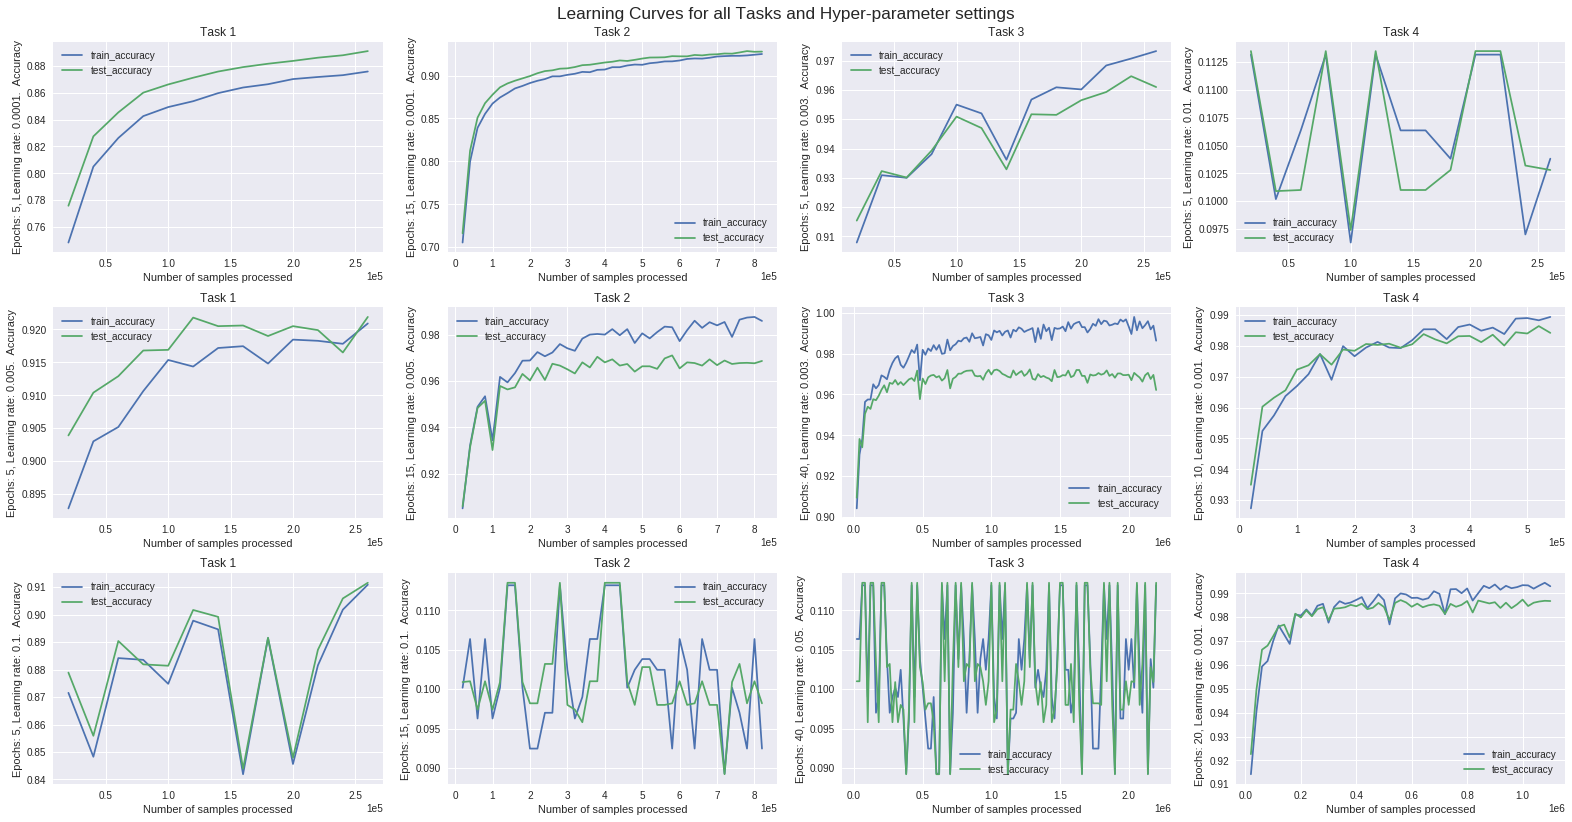

In [34]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

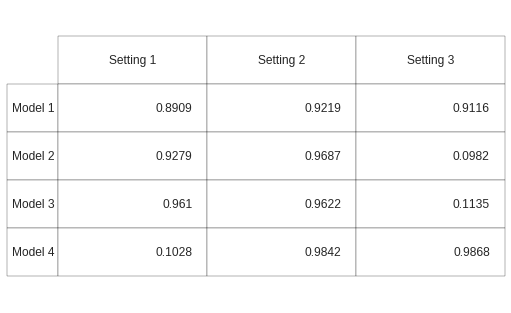

In [35]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3, experiments_task4])

# Questions

###Q1 (32 pts): Compute the following derivatives 
Show all intermediate steps in the derivation (in markdown below). Provide the final results in vector/matrix/tensor form whenever appropiate.

1. [5 pts] Give the cross-entropy loss above, compute the derivative of the loss function with respect to the scores $z$ (the input to the softmax layer). 
$$\frac{\partial loss}{\partial z} = ?$$

2. [12 pts] Consider the first model (M1: linear + softmax). Compute the derivative of the loss with respect to
  * the input $x$
  $$\frac{\partial loss}{\partial x} = ?$$
  * the parameters of the linear layer: weights $W$ and bias $b$
  $$\frac{\partial loss}{\partial W} = ?$$
  $$\frac{\partial loss}{\partial b} = ?$$
  
3. [10 pts] Compute the derivative of a convolution layer wrt. to its parameters W and wrt. to its input (4-dim tensor). Assume a filter of size H x W x D, and stride 1.
  $$\frac{\partial loss}{\partial W} = ?$$


### A1: (Your answer here)
1. [5 pts] Give the cross-entropy loss above, compute the derivative of the loss function with respect to the scores $z$ (the input to the softmax layer).
$$
\frac{\partial loss}{\partial z_i} =  -y_i + \frac{exp(z_i)}{ \sum_{c=1}^{10} \exp(z_{i}[c])} 
$$ 
    $z_i$: the score of i th sample.  $y_i$: the true label of i th sample, a vector having 1 on true class's position.
    

2. [12 pts] Consider the first model (M1: linear + softmax). Compute the derivative of the loss with respect to
  * the input $x$
  $$\frac{\partial loss}{\partial x_i} = \frac{\partial loss}{\partial z_i}*W^T $$
  $x_i$: the input of i th sample.
  * the parameters of the linear layer: weights $W$ and bias $b$
  $$\frac{\partial loss}{\partial W} = \sum_{i=1}^S x_i^T * \frac{\partial loss}{\partial z_i} $$
  $$\frac{\partial loss}{\partial b} = \sum_{i=1}^S\frac{\partial loss}{\partial z_i}$$
  
3. [10 pts] Compute the derivative of a convolution layer wrt. to its parameters W and wrt. to its input (4-dim tensor). Assume a filter of size H x W x D, and stride 1.
$$
\frac{\partial loss}{\partial W_{(h,w,d)}} = \sum_{i=1}^S \sum_{m=1}^M \sum_{n=1}^N \frac{\partial loss}{\partial y_{i}[d,m,n]}*Pad.x_i[m+h-1,n+w-1]
$$
$$
\frac{\partial loss}{\partial b_{d}} = \sum_{i=1}^S \sum_{m=1}^M \sum_{n=1}^N \frac{\partial loss}{\partial y_{i}[d,m,n]}
$$
$$
\frac{\partial loss}{\partial Pad.x_{i}[m,n]} = \sum_{d=1}^D \sum_{h=max(1,m+1-M)}^{min(H,m)} \sum_{w=max(1,n+1-N)}^{min(W,n)} \frac{\partial loss}{\partial y_{i}[d,m-h+1,n-w+1]}* W_{(h,w,d)}
$$

  $W_{(h,w,d)}$: the (h,w,d) th entry of matrix W. $y_{i}[h,m,n]$: the (d,m,n) th entry of i th output. $Pad.x_{i}[m+h-1,n+w-1]$: the (m+h-1,n+w-1) th entry of i th padded input with size (M+2)*(N+2).

### Q2 (8 pts): How do the results compare to the ones you got when implementing these models in TensorFlow? 
1. [4 pts] For each of the models, please comment on any differences or discrepancies in results -- runtime, performance and stability in training and final performance. (This would be the place to justify design decisions in the implementation and their effects).
2. [2 pts] Which of the models show under-fitting?
3. [2 pts] Which of the models show over-fitting?


### A2: (Your answer here)

1. Differences

  Compared with tensorflow, the performances are very similar. They have similar trend on evevy plot. And the performances are even better than tensorflow(from the table). The trainning process is slower especially for the CNN. This is because when implementing forward_pass and backward_pass of convolutional layer, I use cycle for the kernel size and output size. I think the cycle of output size can be removed and cycle for the kernel size and be done at the same time, which is very fast for GPU.
 

2. Underfit

  Task 2 Setting 3 & Task 3 Setting 3 & Task 4 Setting 1: learning rate is too high

  Task 1 Setting 1-3: the model is too simple(linear)

  Task 2 Setting 1: not enough training

3. Overfit

  Task 2 Setting 2: training for so long & learning rate is high

  Task 3 Setting 2: training for so long

  Task 4 Setting 3: training for so long & model is complex
